<a href="https://colab.research.google.com/github/Ayush-Khamrui/HealthGPT/blob/main/app/preprocessing/dataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
file_path = '/health.xlsm'
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names

In [38]:
# Load the first sheet for analysis (assuming primary data is there)
df = pd.read_excel(file_path, sheet_name=sheet_names[0])

In [39]:
# Display basic information about the dataset
print("\n--- Basic Data Information ---")
print("Data Shape:", df.shape)
print("Column Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 Rows of Data:\n", df.head())


--- Basic Data Information ---
Data Shape: (2000, 14)
Column Names: ['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy', 'Smoking', 'salt_content_in_the_diet', 'alcohol_consumption_per_day', 'Level_of_Stress', 'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders']

Data Types:
 Patient_Number                     int64
Blood_Pressure_Abnormality         int64
Level_of_Hemoglobin              float64
Genetic_Pedigree_Coefficient     float64
Age                                int64
BMI                                int64
Sex                                int64
Pregnancy                        float64
Smoking                            int64
salt_content_in_the_diet           int64
alcohol_consumption_per_day      float64
Level_of_Stress                    int64
Chronic_kidney_disease             int64
Adrenal_and_thyroid_disorders      int64
dtype: object

First 5 Rows of Data:
    Patient_Number  

In [40]:
# Check for missing values
print("\n--- Missing Values Report ---")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


--- Missing Values Report ---
Genetic_Pedigree_Coefficient      92
Pregnancy                       1558
alcohol_consumption_per_day      242
dtype: int64


So Out of 2000 column for 1558 Pregnancy data is missing but we need to check which for females.

In [41]:
# Ensure required columns are present
if 'Sex' in df.columns and 'Age' in df.columns and 'Pregnancy' in df.columns:
    # 1. Fill 'Pregnancy' as 0 for females (Sex == 1) with Age >= 55 or Age < 13 and missing Pregnancy data
    condition_age_55_or_above_or_below_13 = (
        (df['Sex'] == 1) &
        ((df['Age'] >= 55) | (df['Age'] < 13)) &
        df['Pregnancy'].isnull()
    )
    df.loc[condition_age_55_or_above_or_below_13, 'Pregnancy'] = 0

    # 2. For females (Sex == 1) aged between 13 and 54, fill missing 'Pregnancy' data with the mode
    condition_age_13_to_54 = (
        (df['Sex'] == 1) &
        (df['Age'] >= 13) &
        (df['Age'] < 55) &
        df['Pregnancy'].isnull()
    )
    # Calculate the mode for Pregnancy within this group
    pregnancy_mode = df.loc[(df['Sex'] == 1) & (df['Age'] >= 13) & (df['Age'] < 55), 'Pregnancy'].mode()[0]
    df.loc[condition_age_13_to_54, 'Pregnancy'] = pregnancy_mode

    # 3. For males (Sex == 0), set all 'Pregnancy' values to 0
    df.loc[df['Sex'] == 0, 'Pregnancy'] = 0

# Verify that no missing values remain in the 'Pregnancy' column
print("\n--- Final Check for Missing Values in 'Pregnancy' Column ---")
print(df['Pregnancy'].isnull().sum())

# Display a sample of the data to confirm changes
print("\nSample Data After Filling Missing Values in 'Pregnancy' Column:\n", df.head())


--- Final Check for Missing Values in 'Pregnancy' Column ---
0

Sample Data After Filling Missing Values in 'Pregnancy' Column:
    Patient_Number  Blood_Pressure_Abnormality  Level_of_Hemoglobin  \
0               1                           1                11.28   
1               2                           0                 9.75   
2               3                           1                10.79   
3               4                           0                11.00   
4               5                           1                14.17   

   Genetic_Pedigree_Coefficient  Age  BMI  Sex  Pregnancy  Smoking  \
0                          0.90   34   23    1        1.0        0   
1                          0.23   54   33    1        0.0        0   
2                          0.91   70   49    0        0.0        0   
3                          0.43   71   50    0        0.0        0   
4                          0.83   52   19    0        0.0        0   

   salt_content_in_the_diet 

In [45]:
# Check for missing values
print("\n--- Missing Values Report ---")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


--- Missing Values Report ---
Series([], dtype: int64)


In [46]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

<ipython-input-46-e1955b69a1a9>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [47]:
# Basic Descriptive Statistics
print("\n--- Descriptive Statistics ---")
print(df.describe())


--- Descriptive Statistics ---
       Patient_Number  Blood_Pressure_Abnormality  Level_of_Hemoglobin  \
count     2000.000000                 2000.000000          2000.000000   
mean      1000.500000                    0.493500            11.710035   
std        577.494589                    0.500083             2.186701   
min          1.000000                    0.000000             8.100000   
25%        500.750000                    0.000000            10.147500   
50%       1000.500000                    0.000000            11.330000   
75%       1500.250000                    1.000000            12.945000   
max       2000.000000                    1.000000            17.560000   

       Genetic_Pedigree_Coefficient          Age          BMI          Sex  \
count                   2000.000000  2000.000000  2000.000000  2000.000000   
mean                       0.494817    46.558500    30.081500     0.496000   
std                        0.284944    17.107832    11.761208     0

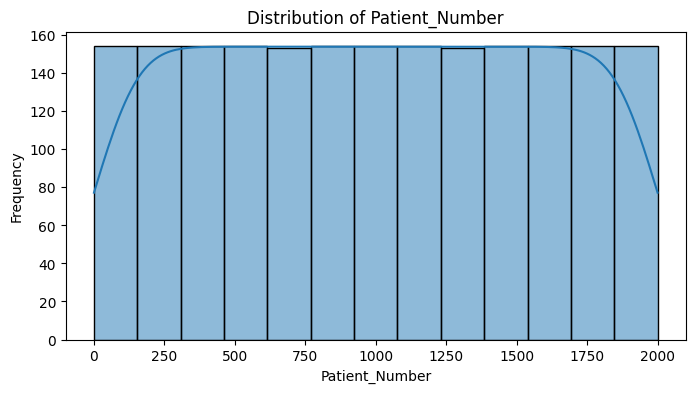

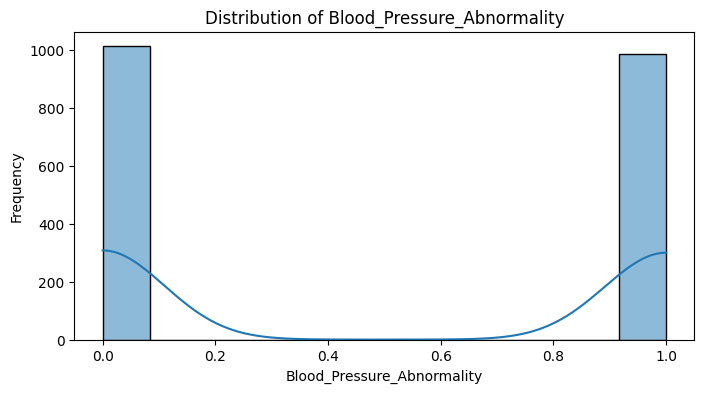

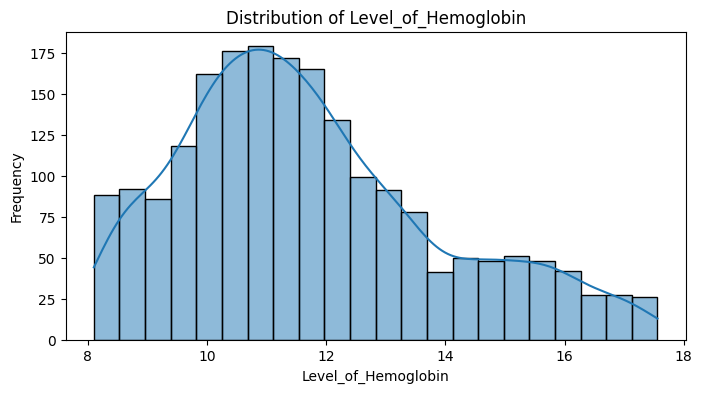

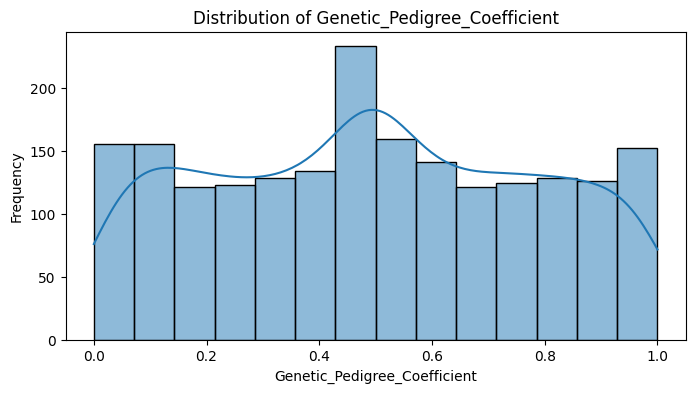

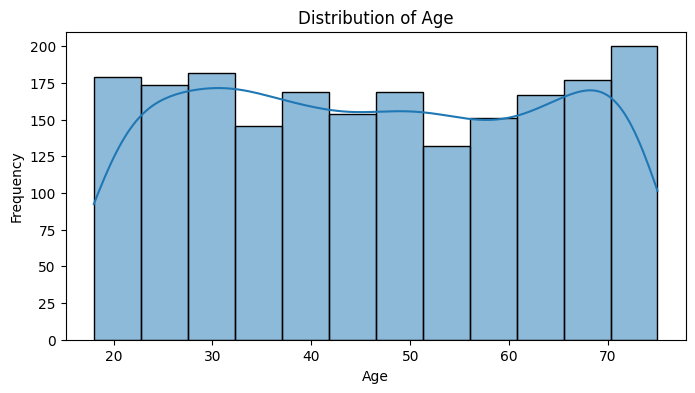

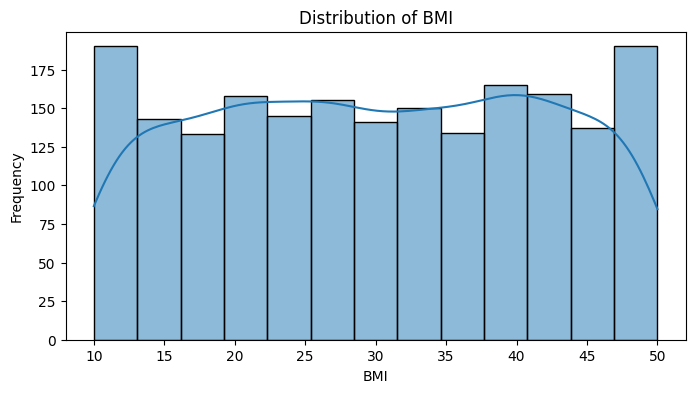

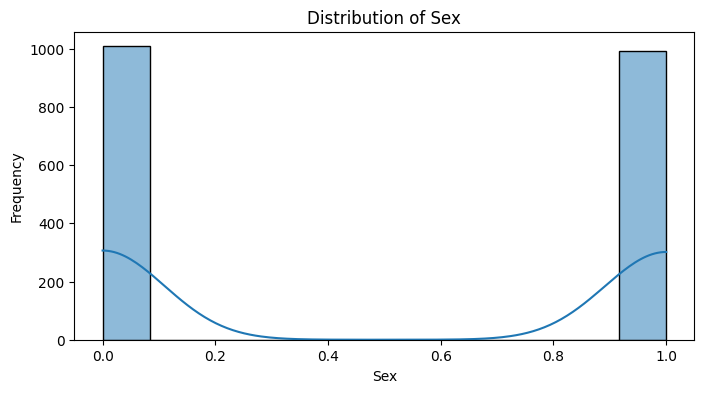

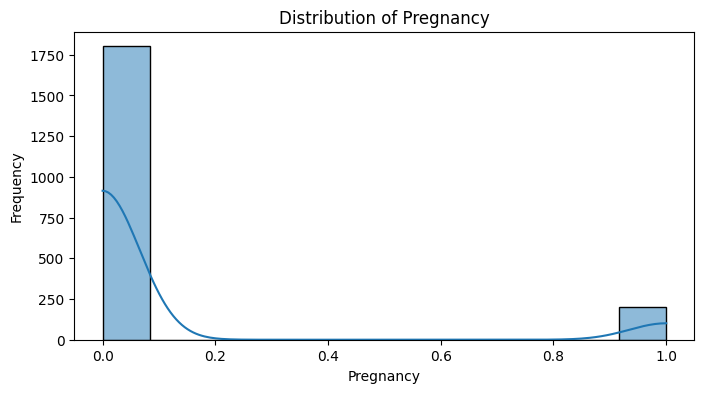

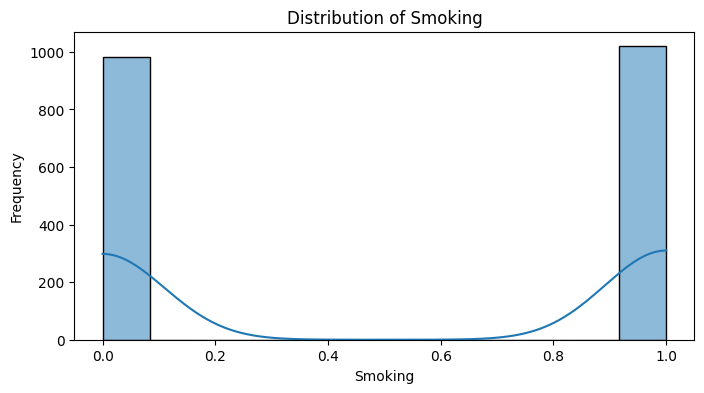

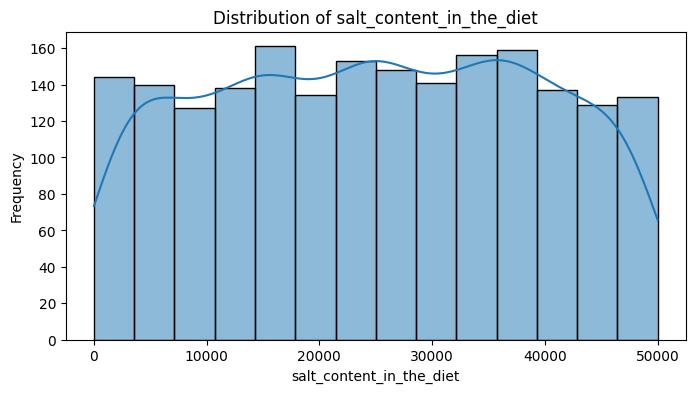

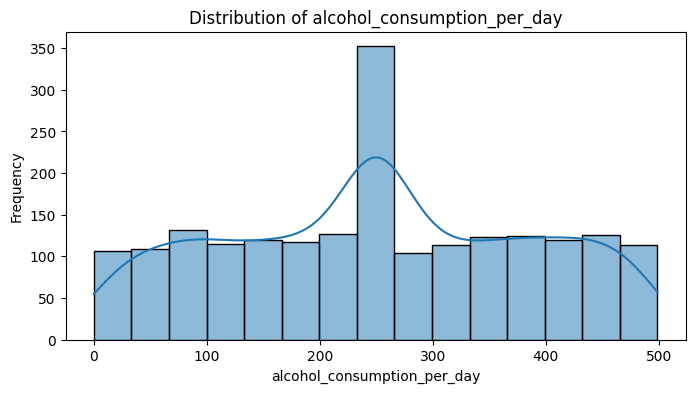

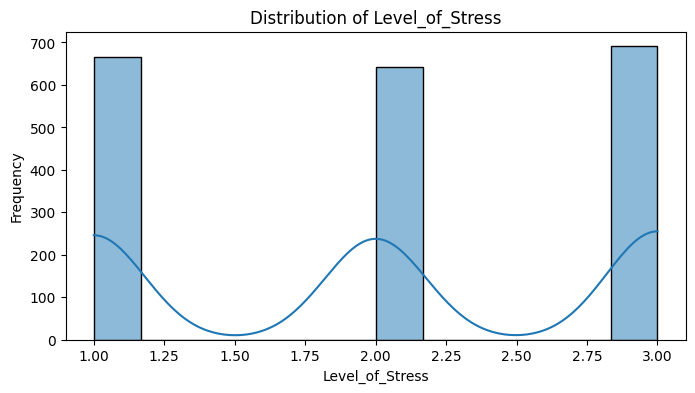

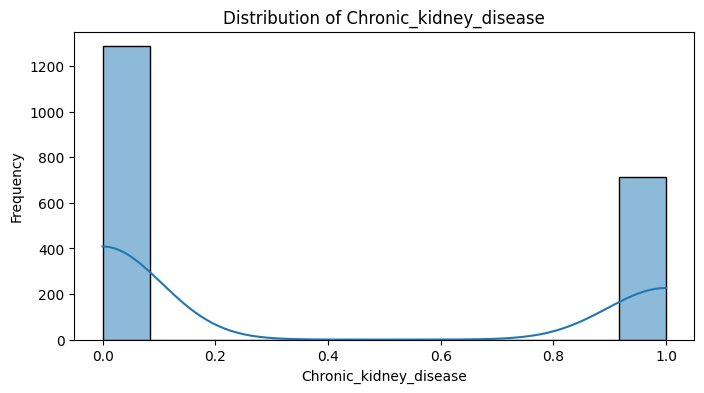

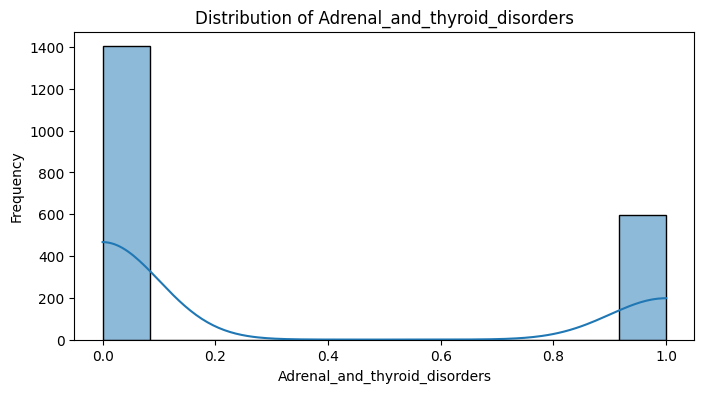

In [48]:
# Distribution plots for numerical columns
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [50]:
# Count plots for categorical columns
cat_columns = df.select_dtypes(include=['object']).columns
for col in cat_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

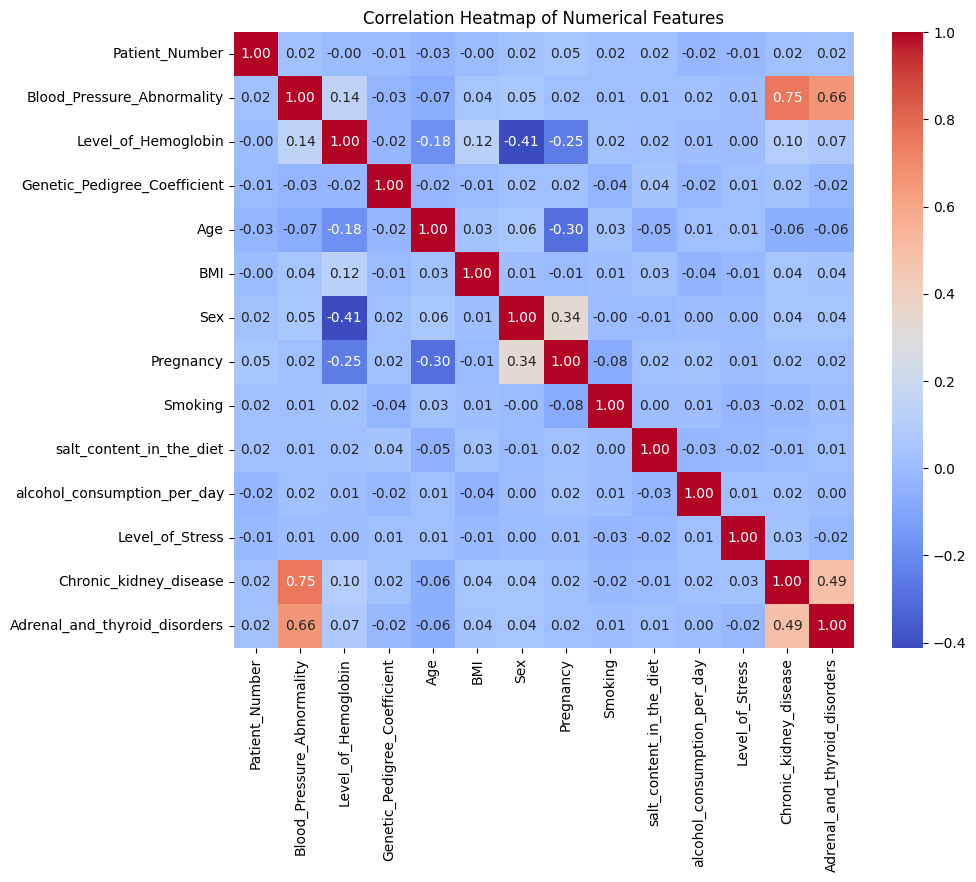

In [51]:
# Correlation heatmap for numeric columns
plt.figure(figsize=(10, 8))
correlation_matrix = df[num_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


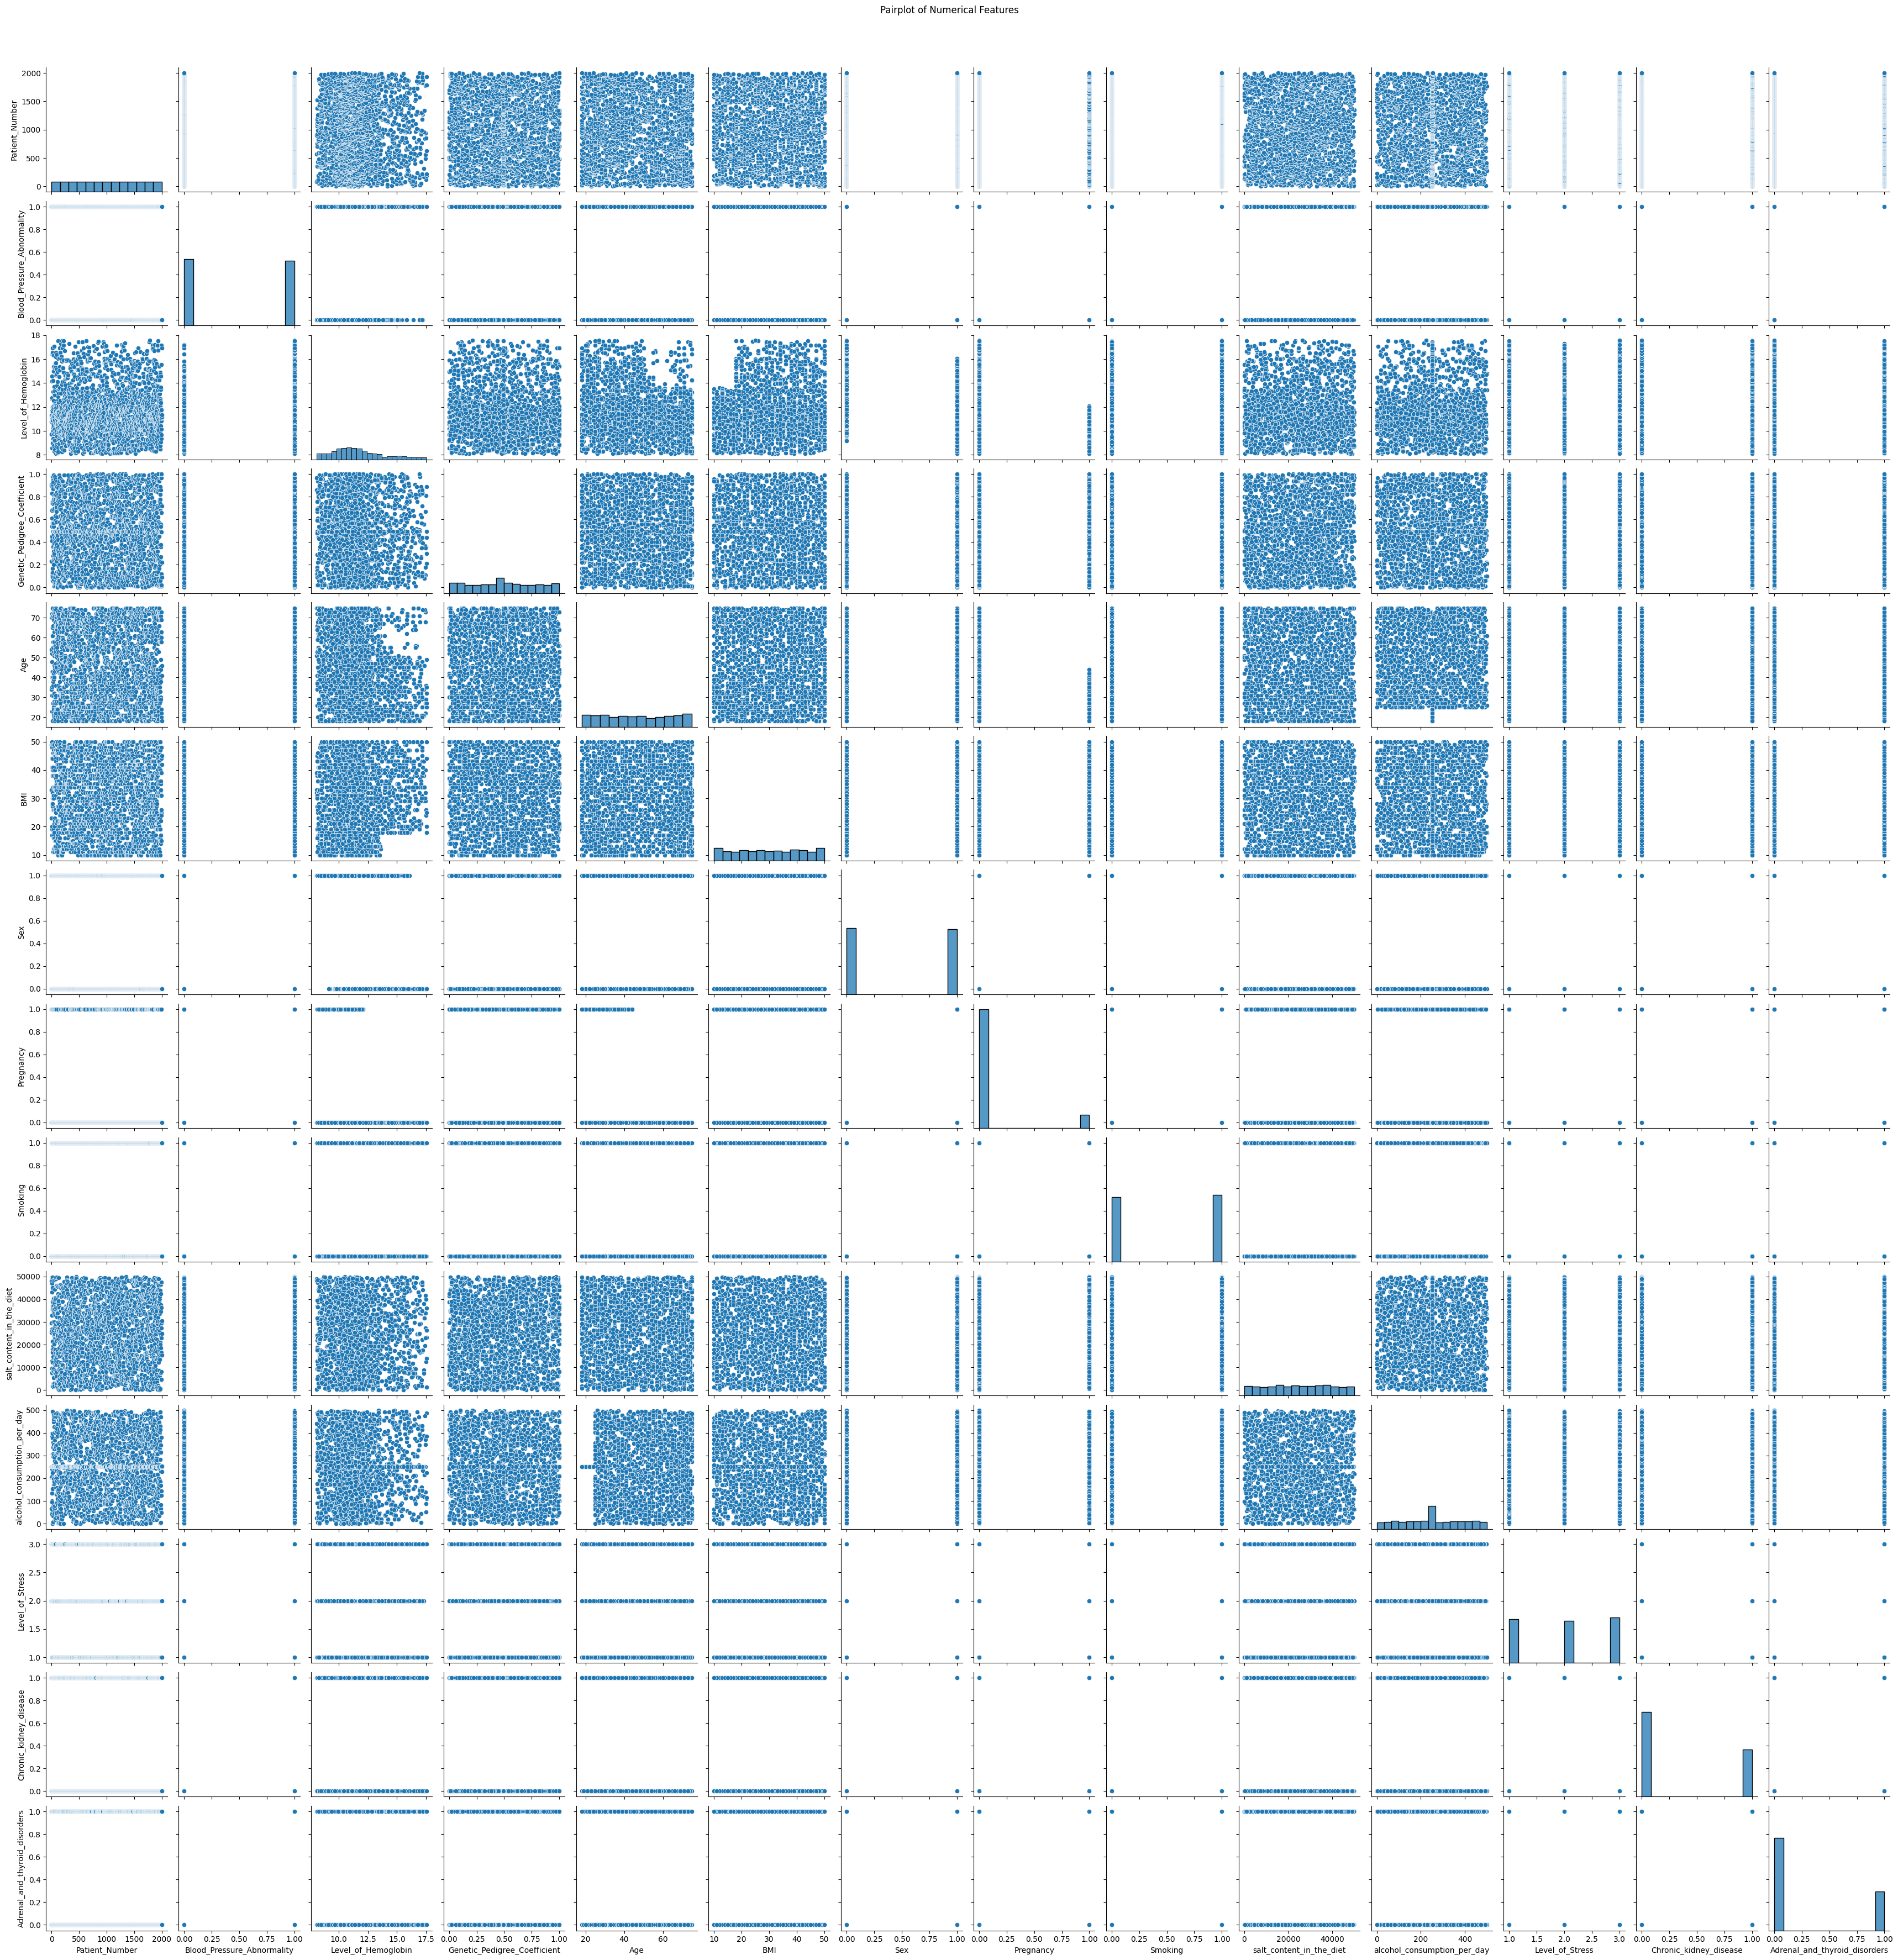

In [52]:
# Pairplot for potential insight into variable relationships
sns.pairplot(df[num_columns])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

In [54]:
# Save the cleaned DataFrame to a new Excel file
output_file_path = '/cleaned_health_data.xlsx'
df.to_excel(output_file_path, index=False)

print(f"\nCleaned data saved to: {output_file_path}")


Cleaned data saved to: /cleaned_health_data.xlsx
